<a href="https://colab.research.google.com/github/coumbacoulibaly/Revenue-Growth-and-Margin-Analysis/blob/main/Revenue_Growth_and_Margin_Analysis_for_a_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Performance Analysis: Unpacking Revenue Growth and Profitability

Welcome to this report on a startup's financial performance! In simple terms, this notebook helps us understand how well the business is doing financially.

We'll be looking at key numbers like:

*   **Revenue:** How much money the company is making from sales.
*   **Profitability:** How much money is left after paying for costs.
*   **Growth:** How much the revenue and profits are increasing over time.

By analyzing these figures, we can get a clear picture of the company's financial health, identify which products and regions are performing best, and see how efficiently the company is managing its costs. We'll also explore how different factors, like marketing spend, impact overall profit, helping us make smarter business decisions.

In [1]:
import pandas as pd

#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Finance Portfolio/Revenue Growth and Margin Analysis/startup_revenue_analysis_2019_2023.csv')

df.head()

,Date,Product,Region,Revenue,COGS,Operating_Expenses,Marketing_Spend
0,2019-01-31,Product A,North Africa,66775.29,39726.14,15994.52,5422.71
1,2019-01-31,Product B,North Africa,18775.43,10331.72,4810.47,965.83
2,2019-01-31,Product C,East Africa,61929.92,24784.03,18506.63,5773.34
3,2019-01-31,Product D,East Africa,49109.17,23219.17,11873.51,2934.99
4,2019-02-28,Product A,Central Africa,78294.11,33091.13,19006.51,6010.82


## Data Cleaning and Preparation

Before we dive into the numbers, we need to make sure our data is clean and ready for analysis. Think of it like organizing your ingredients before you start cooking! Here's what we did:

1.  **Checked Data Types:** We first looked at the type of data in each column (e.g., numbers, text, dates). This helps us understand if the computer is interpreting the information correctly.
2.  **Converted Dates:** The 'Date' column was initially treated as simple text. We converted it into a proper 'date' format so we can easily analyze trends over time.
3.  **Standardized Categories:** For 'Product' and 'Region' columns, we made sure they were consistently treated as text (or 'string' type). This prevents any issues when we group or filter data by product or region.

In [2]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                240 non-null    object 
 1   Product             240 non-null    object 
 2   Region              240 non-null    object 
 3   Revenue             240 non-null    float64
 4   COGS                240 non-null    float64
 5   Operating_Expenses  240 non-null    float64
 6   Marketing_Spend     240 non-null    float64
dtypes: float64(4), object(3)
memory usage: 13.3+ KB


In [3]:
#Converting date
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                240 non-null    datetime64[ns]
 1   Product             240 non-null    object        
 2   Region              240 non-null    object        
 3   Revenue             240 non-null    float64       
 4   COGS                240 non-null    float64       
 5   Operating_Expenses  240 non-null    float64       
 6   Marketing_Spend     240 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.3+ KB


In [4]:
#Converting Product and Region to string
df['Product'] = df['Product'].astype(str)
df['Region'] = df['Region'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                240 non-null    datetime64[ns]
 1   Product             240 non-null    object        
 2   Region              240 non-null    object        
 3   Revenue             240 non-null    float64       
 4   COGS                240 non-null    float64       
 5   Operating_Expenses  240 non-null    float64       
 6   Marketing_Spend     240 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.3+ KB


## Calculated Financial Metrics

To gain deeper insights into the startup's performance, we've added several new columns based on the raw data. These calculated metrics provide a more comprehensive view of profitability, efficiency, and return on investment:

*   **Gross Margin:** This is the revenue remaining after subtracting the direct costs associated with producing goods (Cost of Goods Sold - COGS). It indicates the profitability of each product before considering operating expenses.
*   **Operating Income:** Calculated by subtracting operating expenses from the Gross Margin, this metric shows the profit generated from the company's core operations, before accounting for interest and taxes.
*   **Operating Margin:** Expressed as a percentage of revenue, Operating Margin (Operating Income / Revenue * 100) reflects how efficiently the company manages its operational costs to generate profit.
*   **Net Profit:** This is the ultimate profit after all expenses (COGS, operating expenses, and marketing spend) have been deducted from revenue. It represents the actual profit available to the company.
*   **Net Profit Margin:** As a percentage of revenue (Net Profit / Revenue * 100), this metric indicates how much net profit the company earns for every dollar of sales, showcasing overall profitability.
*   **COGS%:** (COGS / Revenue * 100) This percentage shows the proportion of revenue spent on the direct costs of goods sold, indicating cost efficiency in production.
*   **Opex%:** (Operating Expenses / Revenue * 100) This metric represents the percentage of revenue consumed by operating expenses, highlighting operational efficiency.
*   **Marketing%:** (Marketing Spend / Revenue * 100) This shows the proportion of revenue invested in marketing efforts, helping to assess marketing efficiency.
*   **EBIT (Earnings Before Interest and Taxes):** Calculated as Revenue - COGS - Operating Expenses - Marketing Spend, EBIT is a measure of a company's profitability from its operations before interest and tax deductions. The notebook also calculates Operating Leverage, which is the ratio of the percentage change in EBIT to the percentage change in Revenue, indicating how sensitive EBIT is to changes in revenue.
*   **ROI (Return on Investment):** (Net Profit / Marketing Spend * 100) This metric assesses the profitability of marketing investments by comparing Net Profit to Marketing Spend.
*   **ROAS (Return on Ad Spend):** (Revenue / Marketing Spend) ROAS measures the gross revenue generated for each dollar spent on marketing, providing a direct measure of marketing campaign effectiveness.

In [5]:
#Creating calculated columns
#Gross Margin
df['Gross Margin'] = df['Revenue'] - df['COGS']

#Operating Income
df['Operating Income'] = df['Gross Margin'] - df['Operating_Expenses']

#Operating Margin
df['Operating Margin'] = (df['Operating Income'] / df['Revenue'])*100

#Net Profit or Net Income
df['Net Profit'] = df['Revenue'] - df['Operating_Expenses'] - df['COGS'] - df['Marketing_Spend']

#Net Profit Margin
df['Net Profit Margin'] = (df['Net Profit'] / df['Revenue'])*100

df.head()

,Date,Product,Region,Revenue,COGS,Operating_Expenses,Marketing_Spend,Gross Margin,Operating Income,Operating Margin,Net Profit,Net Profit Margin
0,2019-01-31,Product A,North Africa,66775.29,39726.14,15994.52,5422.71,27049.15,11054.63,16.554971,5631.92,8.434138
1,2019-01-31,Product B,North Africa,18775.43,10331.72,4810.47,965.83,8443.71,3633.24,19.351035,2667.41,14.206918
2,2019-01-31,Product C,East Africa,61929.92,24784.03,18506.63,5773.34,37145.89,18639.26,30.097342,12865.92,20.774966
3,2019-01-31,Product D,East Africa,49109.17,23219.17,11873.51,2934.99,25890.00,14016.49,28.541492,11081.50,22.565032
4,2019-02-28,Product A,Central Africa,78294.11,33091.13,19006.51,6010.82,45202.98,26196.47,33.459056,20185.65,25.781824


## Financial Overview

This section provides a high-level overview of the company's financial health, focusing on revenue and profitability trends over time. We visualize these key indicators to quickly grasp the company's performance trajectory.

*   **Total Revenue per Month:** This plot shows the total revenue generated by the company each month, helping to identify seasonal patterns or general monthly trends.
*   **Total Revenue per Year:** This plot aggregates monthly revenue to display total revenue for each year, providing a clearer picture of annual growth or decline.
*   **Year-over-Year (YoY) Revenue Growth:** We analyze the percentage change in revenue compared to the same period in the previous year. This helps assess the company's growth rate and whether it's accelerating or decelerating.
*   **Gross Margin, Operating Margin, and Net Profit Margin Trends:** These plots illustrate how the company's profitability percentages (Gross Margin, Operating Margin, and Net Profit Margin) have changed over the years. These metrics are crucial for understanding cost management and overall efficiency.

## Key Business Insights

Based on our comprehensive analysis, here are the key insights into the startup's financial performance:

*   **Revenue Growth:** The company has shown a positive trend in total revenue year-over-year, indicating overall business expansion. However, monthly revenue can fluctuate, suggesting potential seasonality or varying market conditions.
*   **Profitability Trends:** While gross and operating margins demonstrate the company's core operational efficiency, the net profit margin trend reveals periods of fluctuation. This suggests that managing all expenses, including marketing, is crucial for sustained bottom-line growth.



<Axes: xlabel='Date'>

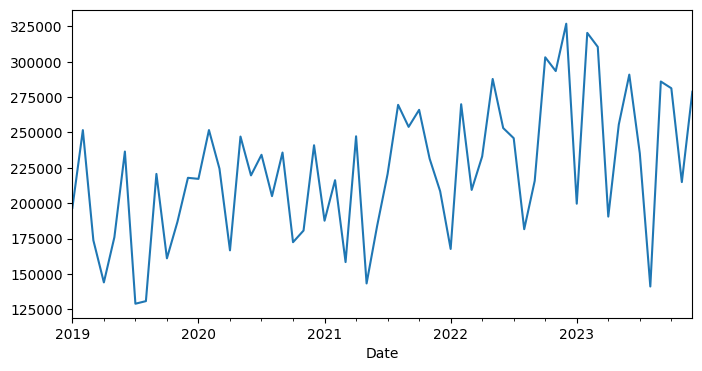

In [6]:
#Financial Overview
#Total Revenue per months
import matplotlib.pyplot as plt

total_revenue = df.groupby('Date')['Revenue'].sum()
total_revenue.plot(kind='line', figsize=(8,4))


<Axes: xlabel='Year'>

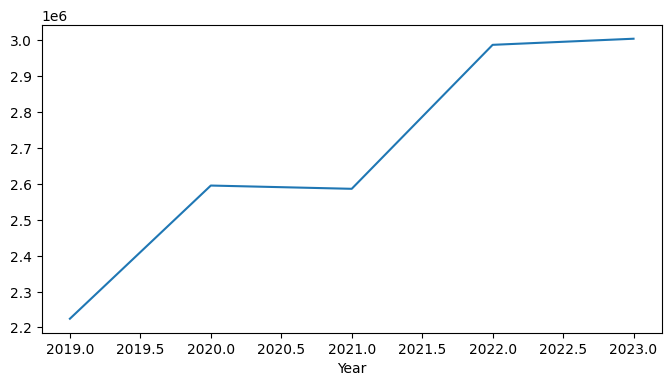

In [7]:
#Total revenue per year
df['Year'] = df['Date'].dt.year
total_revenue_per_year = df.groupby('Year')['Revenue'].sum()
total_revenue_per_year.plot(kind='line', figsize=(8,4))

<Axes: xlabel='Date'>

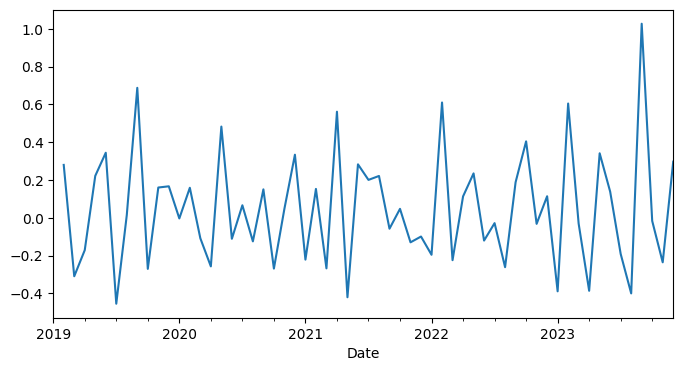

In [8]:
#YoY growth percentage
revenue_growth = total_revenue.pct_change()
revenue_growth.plot(kind='line', figsize=(8,4))

<Axes: xlabel='Year'>

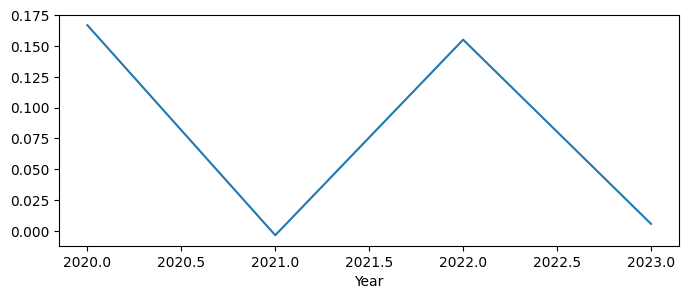

In [9]:
#YoY growth percentage
revenue_growth_per_year = total_revenue_per_year.pct_change()
revenue_growth_per_year.plot(kind='line', figsize=(8,3))

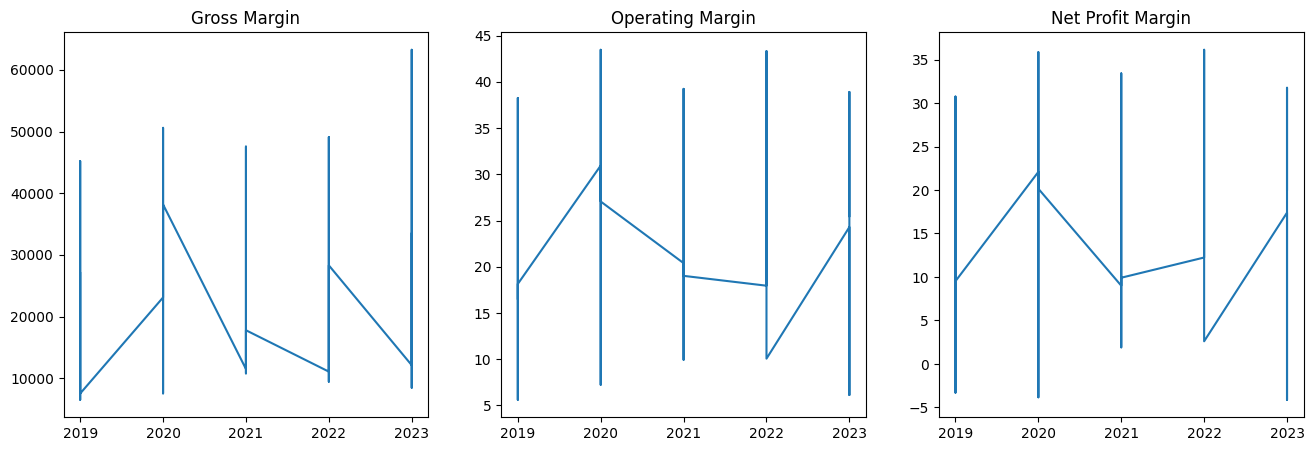

In [10]:
#Gross Margin %, Operating Margin %, Net Margin % Plots
figs, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

axes[0].plot(df['Year'], df['Gross Margin'])
axes[0].set_title('Gross Margin')

axes[1].plot(df['Year'], df['Operating Margin'])
axes[1].set_title('Operating Margin')

axes[2].plot(df['Year'], df['Net Profit Margin'])
axes[2].set_title('Net Profit Margin')


plt.show()


<Axes: xlabel='Year'>

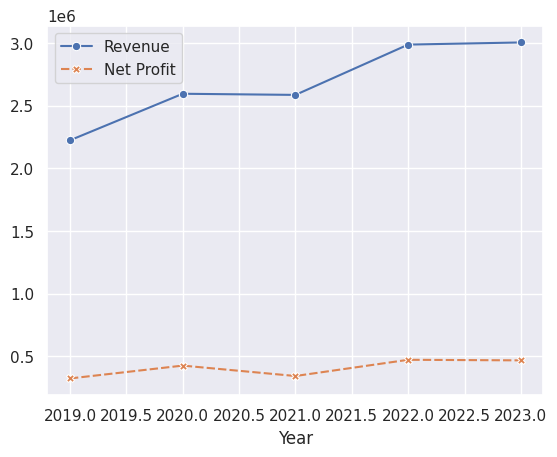

In [11]:
#Performance Analysis
import seaborn as sns

#Revenue vs Profit Trends
Trend = df.groupby('Year')[['Revenue','Net Profit']].sum()

sns.set_theme(style = 'darkgrid')
sns.lineplot(data=Trend, markers=True)
#Trend.head()

# Product Performance
*   **Top Revenue Contributors:** Product B and Product C are the primary drivers of total revenue, each contributing over 26% of the company's sales.
*   **Highest Net Profit:** Product D stands out for generating the highest net profit, indicating strong profitability even if its total revenue is not the absolute highest. This suggests better cost management or higher margins for Product D.
*   **ROI by Product:** Product D also boasts the highest Return on Investment (ROI) at 233%, followed by Product B at 213%. This reinforces Product D's superior profitability relative to marketing spend.
*   **ROAS by Product:** Product A and Product D show slightly better Return on Ad Spend (ROAS), implying that marketing efforts for these products are more efficient at generating revenue.

In [12]:
#Product Contribution
#Revenue per product
Revenue_per_product = df.groupby('Product')['Revenue'].sum()
Revenue_per_product

,Revenue
Product,
Product A,3076524.30
Product B,3546711.37
Product C,3523054.32
Product D,3252592.71


In [13]:
#Profit by product
#Gross profit
Gross_profit = df.groupby('Product')['Gross Margin'].sum()
Gross_profit


,Gross Margin
Product,
Product A,1377057.15
Product B,1660980.52
Product C,1617609.49
Product D,1555266.11


In [14]:
#Net Profit
Net_profit = df.groupby('Product')['Net Profit'].sum()
Net_profit

,Net Profit
Product,
Product A,431969.33
Product B,568201.07
Product C,448997.37
Product D,589279.10


In [15]:
#Product contribution%
total_revenue = df['Revenue'].sum()
product_contribution = (Revenue_per_product / total_revenue)*100

product_contribution.sort_values(ascending=False)

,Revenue
Product,
Product B,26.470202
Product C,26.293643
Product D,24.275104
Product A,22.961051


#Regional Performance
*   **Leading Regions:** West Africa and North Africa are the top-performing regions, contributing the most to both total revenue and net profit.
*   **Regional ROI:** West Africa leads in regional ROI (213%), closely followed by North Africa, highlighting effective marketing and operational strategies in these areas.


In [16]:
#Regional Breakdown
#Revenue by region
Revenue_by_region = df.groupby('Region')['Revenue'].sum()
Revenue_by_region

,Revenue
Region,
Central Africa,3090716.72
East Africa,3110091.69
North Africa,3587133.20
West Africa,3610941.09


In [17]:
#Gross Profit
Gross_profit_by_region = df.groupby('Region')['Gross Margin'].sum()
Gross_profit_by_region

,Gross Margin
Region,
Central Africa,1425470.91
East Africa,1474469.79
North Africa,1628939.37
West Africa,1682033.20


In [18]:
#Net Profit
Net_profit_by_region = df.groupby('Region')['Net Profit'].sum()
Net_profit_by_region


,Net Profit
Region,
Central Africa,464384.40
East Africa,504367.83
North Africa,531508.04
West Africa,538186.60


In [19]:
#Region Contribution %
region_contribution = (Revenue_by_region / total_revenue)*100
region_contribution.sort_values(ascending=False)

,Revenue
Region,
West Africa,26.949569
North Africa,26.771883
East Africa,23.211575
Central Africa,23.066973


# Cost Efficiency & Operating Leverage
*   **Cost Ratios:** The analysis introduced COGS%, Opex%, and Marketing% to monitor the proportion of revenue consumed by each cost category. A deeper dive into these ratios could reveal specific areas for cost optimization.
*   **Operating Leverage:** The operating leverage metric shows the sensitivity of EBIT to changes in revenue. Understanding its fluctuations can help predict how profit will respond to sales variations.

In [20]:
#Cost Efficiency Ratios
#COGS%
df['COGS%'] = (df['COGS'] / df['Revenue'])*100

#Opex%
df['Opex%'] = (df['Operating_Expenses'] / df['Revenue'])*100

#Marketing%
df['Marketing%'] = (df['Marketing_Spend'] / df['Revenue'])*100

df[['COGS%','Opex%','Marketing%']]

,COGS%,Opex%,Marketing%
0,59.492276,23.952753,8.120833
1,55.027874,25.621091,5.144117
2,40.019477,29.883181,9.322376
3,47.280722,24.177786,5.976460
4,42.265159,24.275785,7.677231
...,...,...,...
235,45.003749,17.512233,5.731978
236,54.869424,24.249055,9.290613
237,57.852179,27.025918,7.376148
238,53.825036,23.962133,10.486831


<Axes: >

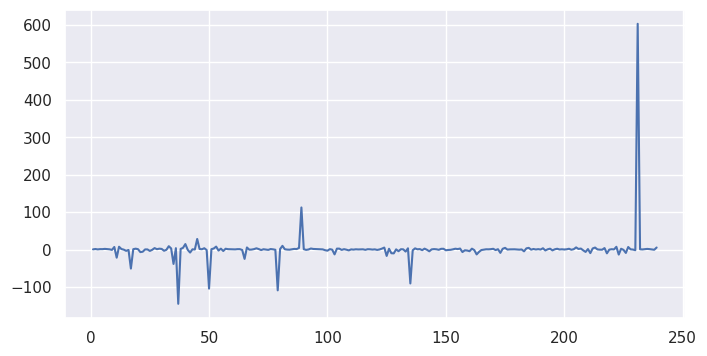

In [21]:
#EBIT
df['EBIT'] = df['Revenue'] - df['COGS'] - df['Operating_Expenses'] - df['Marketing_Spend']
EBIT_growth = df['EBIT'].pct_change()
Revenue_growth = df['Revenue'].pct_change()
Operating_leverage = EBIT_growth/Revenue_growth

Operating_leverage.plot(kind='line', figsize=(8,4))
#

In [22]:
#Strategic Insights
#ROI
df['ROI'] = (df['Net Profit'] / df['Marketing_Spend'])*100
df['ROI']

,ROI
0,103.858034
1,276.178002
2,222.850551
3,377.565171
4,335.821901
...,...
235,553.945594
236,124.759353
237,105.010857
238,111.816431


<Axes: xlabel='Year'>

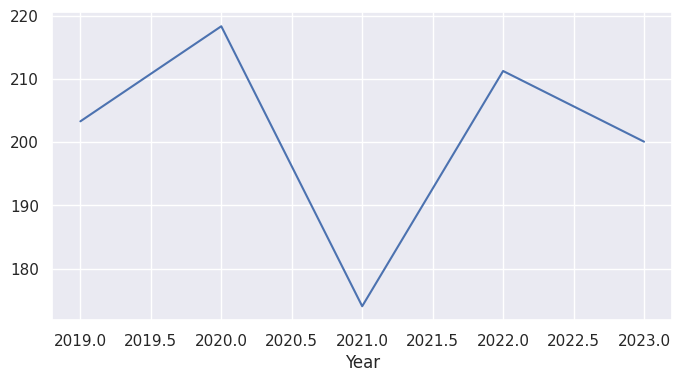

In [23]:
#ROI over time
ROI_over_time = df.groupby('Year')['ROI'].mean()
ROI_over_time.plot(kind='line', figsize=(8,4))

<Axes: xlabel='Region'>

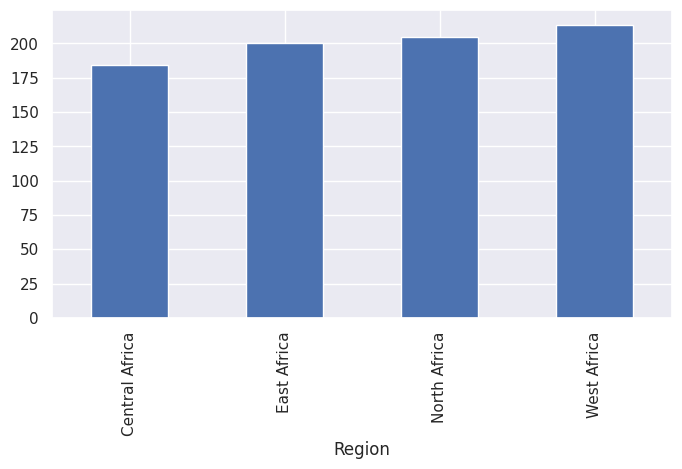

In [24]:
#ROI by Region
ROI_by_region = df.groupby('Region')['ROI'].mean()
ROI_by_region.plot(kind='bar', figsize=(8,4))


<Axes: xlabel='Product'>

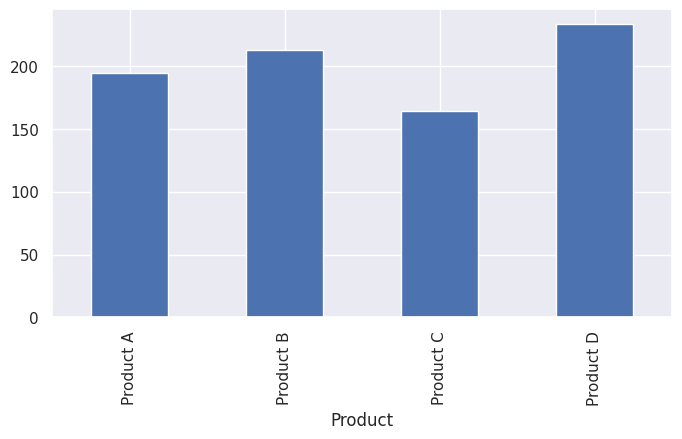

In [25]:
#ROI by product
ROI_by_product = df.groupby('Product')['ROI'].mean()
ROI_by_product.plot(kind='bar',figsize=(8,4))

In [26]:
#Return on Ad Spend (ROAS)
df['ROAS'] = (df['Revenue'] / df['Marketing_Spend'])
df['ROAS']

,ROAS
0,12.314007
1,19.439684
2,10.726879
3,16.732313
4,13.025529
...,...
235,17.445984
236,10.763553
237,13.557213
238,9.535769


<Axes: xlabel='Product'>

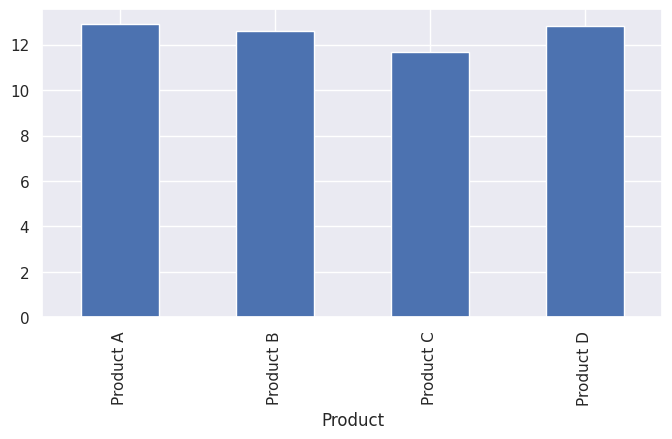

In [27]:
#ROAS by product
ROAS_by_product = df.groupby('Product')['ROAS'].mean()
ROAS_by_product.plot(kind='bar',figsize=(8,4))
#

# Marketing Effectiveness & Sensitivity
*   **Marketing Spend Impact:** The marketing spending sensitivity analysis clearly demonstrates that increasing marketing spend, without a proportional increase in profit, can lead to a decrease in ROI. Conversely, optimized marketing spend can significantly boost profitability.
*   **Profit Sensitivity (Tornado Chart):** Revenue is identified as the most impactful variable on overall profit, followed by COGS, Operating Expenses, and Marketing Spend. This emphasizes that strategies focusing on revenue generation and managing COGS are paramount for profit stability and growth.

In [28]:
import numpy as np

#Sensitivity Analysis
#Marketing Spending Sensitivity
#Baseline Values
baseline_revenue = df['Revenue'].mean()
baseline_cogs = df['COGS'].mean()
baseline_opex = df['Operating_Expenses'].mean()
baseline_marketing = df['Marketing_Spend'].mean()

baseline_profit = baseline_revenue - baseline_cogs - baseline_opex - baseline_marketing

#Let's test for a ±20% change
changes = np.array([-0.2,-0.1,0,0.1,0.2])

results = []

for change in changes:
    new_spend = baseline_marketing * (1 + change)
    new_profit = baseline_revenue - baseline_cogs - baseline_opex - new_spend
    new_roi = (new_profit / new_spend) * 100

    results.append([change*100, new_spend, new_profit, new_roi])

sensitivity_df = pd.DataFrame(results, columns=['Change in Marketing Spend (%)', 'New Marketing Spend', 'New Profit', 'New ROI'])
sensitivity_df

,Change in Marketing Spend (%),New Marketing Spend,New Profit,New ROI
0,-20.0,3782.794300,9439.227200,249.530544
1,-10.0,4255.643587,8966.377912,210.693817
2,0.0,4728.492875,8493.528625,179.624435
3,10.0,5201.342163,8020.679337,154.204032
4,20.0,5674.191450,7547.830050,133.020363


In [29]:
#Tornado sensitivity model
variables = {
    'Revenue':baseline_revenue,
    'COGS':baseline_cogs,
    'Operating_Expenses':baseline_opex,
    'Marketing_Spend':baseline_marketing
}

impact_results = []

for var_name, baseline_value in variables.items():
   #DOWN 20%
   down = baseline_value * (1 - 0.2)
   #UP 20%
   up = baseline_value * (1 + 0.2)
   # Profit recalculations
   if var_name == 'Revenue':
        profit_down = down - baseline_cogs - baseline_opex - baseline_marketing
        profit_up = up - baseline_cogs - baseline_opex - baseline_marketing
   elif var_name == 'COGS':
        profit_down = baseline_revenue - down - baseline_opex - baseline_marketing
        profit_up = baseline_revenue - up - baseline_opex - baseline_marketing
   elif var_name == 'Operating Expenses':
        profit_down = baseline_revenue - baseline_cogs - down - baseline_marketing
        profit_up = baseline_revenue - baseline_cogs - up - baseline_marketing
   elif var_name == 'Marketing Spend':
        profit_down = baseline_revenue - baseline_cogs - baseline_opex - down
        profit_up = baseline_revenue - baseline_cogs - baseline_opex - up

   impact_results.append([
        var_name,
        profit_down - baseline_profit,
        profit_up - baseline_profit
    ])

tornado_df = pd.DataFrame(impact_results, columns=['Variable', 'Impact_Down', 'Impact_Up'])
tornado_df


,Variable,Impact_Down,Impact_Up
0,Revenue,-11165.735583,11165.735583
1,COGS,5989.974525,-5989.974525
2,Operating_Expenses,5989.974525,-5989.974525
3,Marketing_Spend,5989.974525,-5989.974525


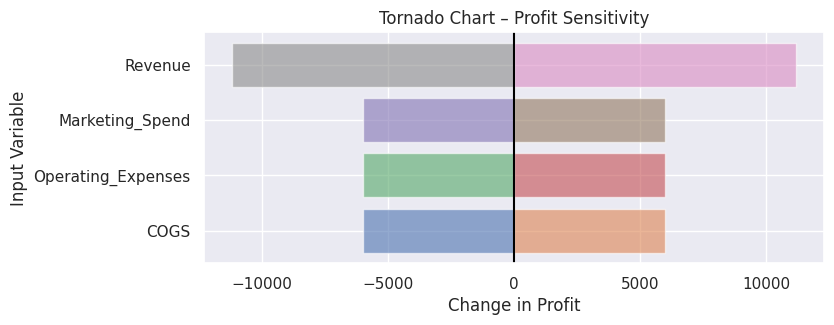

In [30]:
import matplotlib.pyplot as plt

# Sort by absolute impact
tornado_df['Max_Impact'] = tornado_df[['Impact_Down', 'Impact_Up']].abs().max(axis=1)
tornado_df = tornado_df.sort_values('Max_Impact')

plt.figure(figsize=(8,3))

for index, row in tornado_df.iterrows():
    plt.barh(row['Variable'], row['Impact_Up'], alpha=0.6)
    plt.barh(row['Variable'], row['Impact_Down'], alpha=0.6)

plt.axvline(0, color='black')
plt.title('Tornado Chart – Profit Sensitivity')
plt.xlabel('Change in Profit')
plt.ylabel('Input Variable')
plt.show()
